In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# A

In [2]:
ds = pd.read_csv('Bitcoin.csv')

In [3]:
# Extract the "Time" and "Log_Price" columns
time = ds['Date']
log_close = np.log(ds['Close'])

In [4]:
log_close

0       6.125414
1       6.050771
2       5.978369
3       6.013480
4       5.988513
          ...   
3024    9.714297
3025    9.719705
3026    9.717314
3027    9.713990
3028    9.717905
Name: Close, Length: 3029, dtype: float64

In [5]:
mean = 0.0
mean_values = []

# Iterate through the log price row by row
for i in range(len(log_close)):
    mean = (mean * i + log_close[i]) / (i + 1)
    mean_values.append(mean)

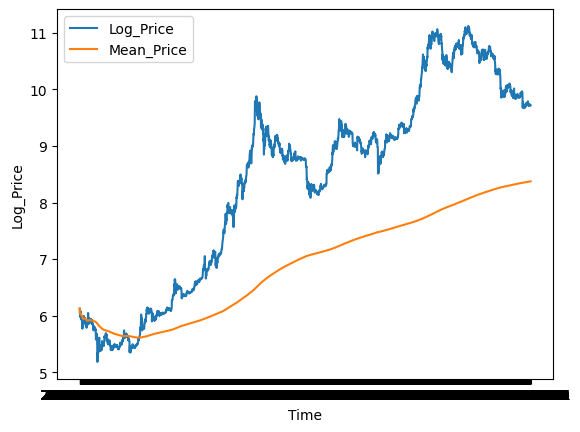

In [6]:
# Plot the price of Bitcoin
plt.plot(time, log_close, label='Log_Price')

# Plot the mean values
plt.plot(time, mean_values, label='Mean_Price')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Log_Price')
plt.legend()

# Show the plot
plt.show()

# B

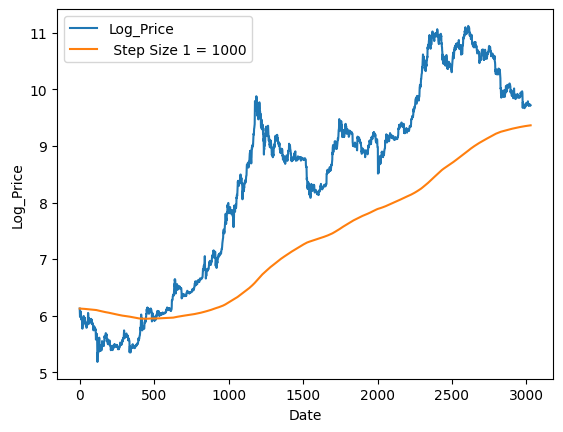

In [11]:
# Define parameters
ew_average_list1 = [log_close.iloc[0]]
ew_average_list2 = [log_close.iloc[0]]
stepsize1 = 1000
stepsize2 = 10
alpha1 = 1 - math.exp(-1 / stepsize1)
alpha2 = 1 - math.exp(-1 / stepsize2)

ew_average1 = log_close.iloc[0]
ew_average2 = log_close.iloc[0]

# Calculate the EWMA with step size 1
for i in range(1, len(log_close)):
    new_price = log_close.iloc[i]
    ew_average1 = new_price * alpha1 + (1 - alpha1) * ew_average1
    ew_average_list1.append(ew_average1)

# Calculate the EWMA with step size 2
for i in range(1, len(log_close)):
    new_price = log_close.iloc[i]
    ew_average2 = new_price * alpha2 + (1 - alpha2) * ew_average2
    ew_average_list2.append(ew_average2)

# Plot the price of Bitcoin
plt.plot(log_close, label='Log_Price')

# Plot the exponentially weighted moving averages
plt.plot(ew_average_list1, label=' Step Size 1 = {}'.format(stepsize1))
# plt.plot(ew_average_list2, label='Step Size 2 = {}'.format(stepsize2))

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Log_Price')
plt.legend()

# Show the plot
plt.show()


# C

1612


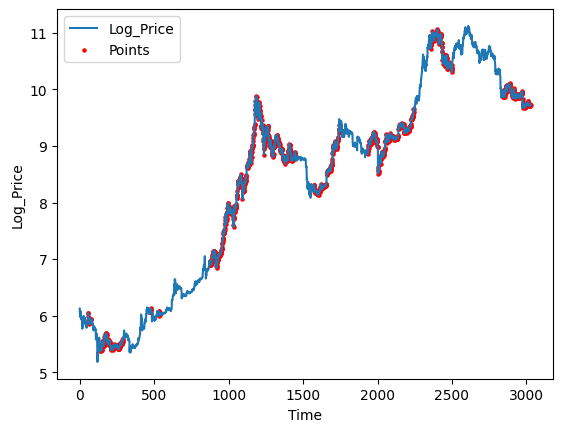

In [85]:
variance_list = []
var_mean_list = []
M2 = 0
mean = log_close.iloc[0]
points = []

stepsize = 500
alpha = 1 - math.exp(-1 / stepsize)

stepsize_2 = 50
alpha_2 = 1 - math.exp(-1 / stepsize_2)

count = 0

for i in range(1, len(log_close)):
    new_price = log_close.iloc[i]
    delta = new_price - mean
    mean = new_price * alpha + (1-alpha) * mean
    delta2 = new_price - mean
    M2 += (delta * delta2)
    
    if i == 2:
        variance = M2 / (i + 1)
        var_mean = variance
    
    if i > 2:
        variance = M2 / (i + 1)
        var_mean = variance * alpha_2 + (1 - alpha_2) * var_mean
        var_mean_list.append(var_mean)
        variance_list.append(variance)
        if abs(variance - var_mean) > 0.01:
            count += 1
            if count >= 40:
                points.append((i, new_price))
        else:
            count = 0


plt.plot(log_close, label='Log_Price')
print(len(points))

x_points = [point[0] for point in points]
y_points = [point[1] for point in points]
plt.scatter(x_points, y_points, color='red', label='Points',s= 5)


plt.xlabel('Time')
plt.ylabel('Log_Price')
plt.legend()


plt.show()
